In [72]:
import time
# import geopandas as gpd
import os
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import requests
import plotly.graph_objects as go
from scipy.cluster import hierarchy
import json as json
import IPython
from IPython.display import display
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Endpoints
API_FOOTBALL_PLAYERS_ENDPOINT = "https://api-football-v1.p.rapidapi.com/v3/players"


## PL = 39
BUNDESLIGA = "78"
## La Liga = 140


DATA_PATH = "data"

# set the current league we are extracting data for
CHAMPIONSHIP = BUNDESLIGA

# Season year
SEASON_22 = "2022"
# Season year
SEASON_23 = "2023"

# Http Codes
TOO_MANY_REQUESTS = 429

# Initial Page
FIRST = 1

In [ ]:
def get_api_key():
    key = 'YOUR_API_KEY'
    return key

In [ ]:
def get_total_pages():
    querystring_ = {"league": CHAMPIONSHIP, "season": SEASON_22, "page": 30}
    json_response_stats_league = get_api_football(API_FOOTBALL_PLAYERS_ENDPOINT, querystring_, get_api_key())
    parsed_stats_league = draw_pretty_json(json_response_stats_league)

    return parsed_stats_league['paging']['total']

In [ ]:
def get_api_response(url, querystring, key, method="GET"):
    url = url
    headers = {
        'x-rapidapi-key': key,
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com"
    }
    response = requests.request(method, url, headers=headers, params=querystring)

    return response

In [ ]:
def get_api_football(url, querystring, key):

    response = get_api_response(url, querystring, key, method="GET")

    json_response = response.text
    print(response.status_code, '::', response.url)
    print(response.headers)

    if response.status_code == TOO_MANY_REQUESTS:
        print(response.text)

    return json_response

In [ ]:
def draw_pretty_json(json_resp):
    parsed = json.loads(json_resp)
    print(json.dumps(parsed, indent=4, sort_keys=True))
    return parsed

In [ ]:
# Loop all passes accuracy api page team
def get_data(parsed):
    # General
    id_list = []
    team_list = []
    name_list = []
    position_list = []
    age_list = []
    height_list = []
    weight_list = []
    nationality_list = []
    injured_list = []
    photo_list = []
    logo_team_list = []
    rating_list = []
    captain_list = []

    # Passes
    passes_acc_list = []
    passes_total_list = []
    passes_key_list = []

    # Shots
    shots_on_list = []
    shots_total_list = []

    # Fouls
    fouls_drawn_list = []
    fouls_comm_list = []

    # Dribbles
    dribbles_attempts = []
    dribbles_past = []
    dribbles_success = []

    # Games
    games_app_list = []
    games_minutes_list = []
    games_rating_list = []

    # Goals
    goals_total_list = []
    goals_assist_list = []
    goals_conc_list = []
    goals_saved_list = []

    # Tackles
    tackles_blocks_list = []
    tackles_inter_list = []
    tackles_total_list = []

    # Duels
    duels_won_list = []
    duels_total_list = []

    # Cards
    yellow_card_list = []
    red_card_list = []
    yellowred_card_list = []

    for i in range(0, parsed['results']):
        # Mains
        response = parsed['response'][i]
        stats = response['statistics'][0]

        # General
        id_player = response['player']['id']
        team = stats['team']['name']
        logo_team = stats['team']['logo']
        name = response['player']['name']
        age = response['player']['age']
        height = response['player']['height']
        weight = response['player']['weight']
        nationality = response['player']['nationality']
        injured = response['player']['injured']
        photo = response['player']['photo']

        # Appends
        position_list.append(stats['games']['position'])
        rating_list.append(stats['games']['rating'])
        captain_list.append(stats['games']['captain'])
        age_list.append(age)
        height_list.append(height)
        weight_list.append(weight)
        nationality_list.append(nationality)
        injured_list.append(injured)
        photo_list.append(photo)
        id_list.append(id_player)
        team_list.append(team)
        name_list.append(name)
        logo_team_list.append(logo_team)

        # Cards
        yellow_card_list.append(stats['cards']['yellow'])
        red_card_list.append(stats['cards']['red'])
        yellowred_card_list.append(stats['cards']['yellowred'])

        # Passes
        passes_acc_list.append(stats['passes']['accuracy'])
        passes_total_list.append(stats['passes']['total'])
        passes_key_list.append(stats['passes']['key'])

        # Shots
        shots_on_list.append(stats['shots']['on'])
        shots_total_list.append(stats['shots']['total'])

        # Fouls
        fouls_drawn_list.append(stats['fouls']['drawn'])
        fouls_comm_list.append(stats['fouls']['committed'])

        # Dribbles
        dribbles_attempts.append(stats['dribbles']['attempts'])
        dribbles_past.append(stats['dribbles']['past'])
        dribbles_success.append(stats['dribbles']['success'])

        # Games
        games_app_list.append(stats['games']['appearences'])
        games_minutes_list.append(stats['games']['minutes'])
        games_rating_list.append(stats['games']['rating'])

        # Goals
        goals_total_list.append(stats['goals']['total'])
        goals_assist_list.append(stats['goals']['assists'])
        goals_conc_list.append(stats['goals']['conceded'])
        goals_saved_list.append(stats['goals']['saves'])

        # Tackles
        tackles_blocks_list.append(stats['tackles']['blocks'])
        tackles_inter_list.append(stats['tackles']['interceptions'])
        tackles_total_list.append(stats['tackles']['total'])

        # Duels
        duels_total_list.append(stats['duels']['total'])
        duels_won_list.append(stats['duels']['won'])

    api_data = pd.DataFrame({"Id": id_list, "Name": name_list,
                             "Age": age_list,
                             "Height": height_list,
                             "Weight": weight_list,
                             "Nationality": nationality_list,
                             "Injured": injured_list,
                             "Team": team_list,
                             "Position": position_list,
                             "Games": games_app_list,
                             "Minutes": games_minutes_list,
                             "Accuracy_Passes": passes_acc_list,
                             "Key_Passes": passes_key_list,
                             "Total_Passes": passes_total_list,
                             "Shots_On": shots_on_list,
                             "Shots_Total": shots_total_list,
                             "Dribbles_Attempts": dribbles_attempts,
                             "Dribbles_Past": dribbles_past,
                             "Dribbles_Success": dribbles_success,
                             "Fouls_Drawn": fouls_drawn_list,
                             "Fouls_Committed": fouls_comm_list,
                             "Tackled_Block": tackles_blocks_list,
                             "Tackled_Intercept": tackles_inter_list,
                             "Tackled_Total": tackles_total_list,
                             "Duels_Won": duels_won_list,
                             "Duels_Total": duels_total_list,
                             "Goals_Assist": goals_assist_list,
                             "Goals_Total": goals_total_list,
                             "Goals_Conceded": goals_conc_list,
                             "Goals_Saves": goals_saved_list,
                             "Photo": photo_list,
                             "Logo_Team": logo_team_list,
                             "Rating": rating_list,
                             "Yellow_Cards": yellow_card_list,
                             "Red_Cards": red_card_list,
                             "Yellow_Red_Cards": yellowred_card_list,
                             "Captain": captain_list
                             })
    return api_data

In [ ]:
def get_championship_data(url, key, initial=FIRST):
    request_x_minute = 30
    df = pd.DataFrame()
    for page_ in range(initial, get_total_pages()):
        qs = {"league": CHAMPIONSHIP, "season": SEASON_22, "page": page_}
        json_response = get_api_football(url, qs, key)
        parsed = json.loads(json_response)
        api_data = get_data(parsed)
        df = pd.concat([df, api_data], ignore_index=True)

        # You have to control time between requests in the BASIC Plan.
        if page_ == request_x_minute - 2:
            # Sleep the process to avoid TOO_MANY_REQUESTS
            time.sleep(121)

    return df

In [ ]:
def clean_weight_height(df):
    df['Weight_kg'] = (df['Weight'].str.extract('^([0-9]{2,3})')).astype(float)
    df['Height_cm'] = (df['Height'].str.extract('^([0-9]{3})')).astype(float)

    df.drop(['Weight', 'Height'], axis=1, inplace=True)

    return df

In [ ]:
if __name__ == '__main__':
    # Get API Key
    key = get_api_key()
    # Get dataset from API
    df_championship = get_championship_data(API_FOOTBALL_PLAYERS_ENDPOINT, key)
    # Save dataset in csv format

    df_championship.to_excel('Data_football_Bundesliga.xlsx', index= False)

## Merge all three DataFrame

In [36]:
df_spanish = pd.read_excel('/content/Data_football_LaLiga.xlsx')
df_premierLeauge = pd.read_excel('/content/Data_football_Bundesliga.xlsx')
df_bundesliga = pd.read_excel('/content/Data_football_PremierLeauge.xlsx')

### MAIN DATAFRAME

In [37]:
df = pd.concat([df_spanish,df_bundesliga,df_premierLeauge], ignore_index= True)

##Data Cleaning

In [38]:
df

,Id,Name,Age,Height,Weight,Nationality,Injured,Team,Position,Games,...,Goals_Total,Goals_Conceded,Goals_Saves,Photo,Logo_Team,Rating,Yellow_Cards,Red_Cards,Yellow_Red_Cards,Captain
0,660,Pape Cheikh,26.0,180 cm,68 kg,Senegal,False,Elche,Midfielder,2.0,...,0.0,0.0,NaN,https://media.api-sports.io/football/players/6...,https://media.api-sports.io/football/teams/797...,6.300000,1.0,1.0,0.0,False
1,1560,Barragán,35.0,182 cm,76 kg,Spain,False,Elche,Defender,NaN,...,NaN,NaN,NaN,https://media.api-sports.io/football/players/1...,https://media.api-sports.io/football/teams/797...,NaN,NaN,NaN,NaN,False
2,1563,Z. Feddal,34.0,192 cm,84 kg,Morocco,False,Valladolid,Defender,8.0,...,0.0,0.0,NaN,https://media.api-sports.io/football/players/1...,https://media.api-sports.io/football/teams/720...,6.775000,1.0,0.0,0.0,False
3,46665,Iñigo Pérez,34.0,178 cm,74 kg,Spain,False,Osasuna,Midfielder,NaN,...,NaN,NaN,NaN,https://media.api-sports.io/football/players/4...,https://media.api-sports.io/football/teams/727...,NaN,NaN,NaN,NaN,False
4,46998,Juan Cala,34.0,185 cm,78 kg,Spain,False,Cadiz,Defender,3.0,...,0.0,0.0,NaN,https://media.api-sports.io/football/players/4...,https://media.api-sports.io/football/teams/724...,6.766666,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,26303,B. Sosa,26.0,187 cm,79 kg,Croatia,False,VfB Stuttgart,Defender,25.0,...,2.0,0.0,NaN,https://media.api-sports.io/football/players/2...,https://media.api-sports.io/football/teams/172...,7.248148,5.0,0.0,0.0,False
2336,38750,B. Brobbey,22.0,180 cm,78 kg,Netherlands,False,RB Leipzig,Attacker,0.0,...,0.0,NaN,NaN,https://media.api-sports.io/football/players/3...,https://media.api-sports.io/football/teams/173...,NaN,0.0,0.0,0.0,False
2337,73868,R. Pepi,21.0,185 cm,73 kg,USA,False,FC Augsburg,Attacker,4.0,...,0.0,0.0,NaN,https://media.api-sports.io/football/players/7...,https://media.api-sports.io/football/teams/170...,6.633333,0.0,0.0,0.0,False
2338,113581,T. Coulibaly,23.0,178 cm,75 kg,France,False,VfB Stuttgart,Midfielder,14.0,...,4.0,0.0,NaN,https://media.api-sports.io/football/players/1...,https://media.api-sports.io/football/teams/172...,6.838461,3.0,0.0,0.0,False


In [39]:
df.columns

Index(['Id', 'Name', 'Age', 'Height', 'Weight', 'Nationality', 'Injured',
       'Team', 'Position', 'Games', 'Minutes', 'Accuracy_Passes', 'Key_Passes',
       'Total_Passes', 'Shots_On', 'Shots_Total', 'Dribbles_Attempts',
       'Dribbles_Past', 'Dribbles_Success', 'Fouls_Drawn', 'Fouls_Committed',
       'Tackled_Block', 'Tackled_Intercept', 'Tackled_Total', 'Duels_Won',
       'Duels_Total', 'Goals_Assist', 'Goals_Total', 'Goals_Conceded',
       'Goals_Saves', 'Photo', 'Logo_Team', 'Rating', 'Yellow_Cards',
       'Red_Cards', 'Yellow_Red_Cards', 'Captain'],
      dtype='object')

In [40]:
## From the above data we can ignore the Photo and Logo_team

df.drop(['Logo_Team','Photo'], axis = 1 , inplace = True)

In [41]:
df['Captain'].value_counts() ### removing captian since only False value is present

Captain
False    2340
Name: count, dtype: int64

In [42]:
df.drop('Captain', axis = 1 , inplace = True)

In [43]:
df['Injured'].value_counts() ## removing injured since only False value is present

Injured
False    2340
Name: count, dtype: int64

In [44]:
df.drop('Injured', axis = 1 , inplace = True)

In [45]:
df.isna().sum()

Id                      0
Name                    0
Age                     2
Height                170
Weight                323
Nationality             0
Team                    0
Position                0
Games                  67
Minutes                67
Accuracy_Passes       669
Key_Passes            931
Total_Passes          662
Shots_On             1120
Shots_Total           958
Dribbles_Attempts     893
Dribbles_Past        2340
Dribbles_Success      970
Fouls_Drawn           848
Fouls_Committed       848
Tackled_Block        1200
Tackled_Intercept     970
Tackled_Total         858
Duels_Won             736
Duels_Total           698
Goals_Assist         1516
Goals_Total            67
Goals_Conceded        304
Goals_Saves          2223
Rating                672
Yellow_Cards           67
Red_Cards              67
Yellow_Red_Cards       67
dtype: int64

In [46]:
df.dtypes

Id                     int64
Name                  object
Age                  float64
Height                object
Weight                object
Nationality           object
Team                  object
Position              object
Games                float64
Minutes              float64
Accuracy_Passes      float64
Key_Passes           float64
Total_Passes         float64
Shots_On             float64
Shots_Total          float64
Dribbles_Attempts    float64
Dribbles_Past        float64
Dribbles_Success     float64
Fouls_Drawn          float64
Fouls_Committed      float64
Tackled_Block        float64
Tackled_Intercept    float64
Tackled_Total        float64
Duels_Won            float64
Duels_Total          float64
Goals_Assist         float64
Goals_Total          float64
Goals_Conceded       float64
Goals_Saves          float64
Rating               float64
Yellow_Cards         float64
Red_Cards            float64
Yellow_Red_Cards     float64
dtype: object

In [47]:
df.loc[:, ['Red_Cards', 'Yellow_Red_Cards', 'Yellow_Cards', 'Goals_Saves', 'Goals_Total', 'Goals_Assist']] = df.loc[:, ['Red_Cards', 'Yellow_Red_Cards', 'Yellow_Cards', 'Goals_Saves', 'Goals_Total', 'Goals_Assist']].fillna(0) ## make the nan values zero because these players have not received a red or yelllow card in that season , and they their position is diferent hence no assists or goals conceded

In [48]:
### Removing cm and kg from height and weight column
df['Weight'] = df['Weight'].str.replace(' kg', '')
df['Height'] = df['Height'].str.replace(' cm', '')

In [49]:
## finding mean of height and weight
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')


mean_weight = df['Weight'].mean()
df['Weight'].fillna(mean_weight, inplace=True)


mean_height = df['Height'].mean()
df['Height'].fillna(mean_height, inplace=True)

### filling age by mean

mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)


In [50]:
## Since no player is injured filling the games and minutes with minimum number of games and minutes played
min_games = df['Games'].min()
df['Games'].fillna(min_games, inplace=True)


min_minutes = df['Minutes'].min()
df['Minutes'].fillna(min_minutes, inplace=True)

In [51]:
## Dribbles Past does not contain any value in it hence removing that column
df.drop('Dribbles_Past',axis = 1 , inplace = True )


In [52]:
## filling goals conceded from mean of goalkeeper and defender
goalkeeper_mean = df.loc[df['Position'] == 'goalkeeper', 'Goals_Conceded'].mean()
defender_mean = df.loc[df['Position'] == 'defender', 'Goals_Conceded'].mean()

In [53]:
df.loc[df['Position'] == 'goalkeeper', 'Goals_Conceded'] = df.loc[df['Position'] == 'goalkeeper', 'Goals_Conceded'].fillna(goalkeeper_mean)
df.loc[df['Position'] == 'defender', 'Goals_Conceded'] = df.loc[df['Position'] == 'defender', 'Goals_Conceded'].fillna(defender_mean)

In [54]:
df['Goals_Conceded'].fillna(0, inplace=True) ## for other positions

In [55]:
# Fill NaN values in 'Shots_On' based on the 'Position' column
attacker_min = df.loc[df['Position'] == 'attacker', 'Shots_On'].min()
midfielder_min = df.loc[df['Position'] == 'midfielder', 'Shots_On'].min()

df['Shots_On'].fillna(0, inplace=True)
df.loc[df['Position'] == 'attacker', 'Shots_On'] = df.loc[df['Position'] == 'attacker', 'Shots_On'].fillna(attacker_min)
df.loc[df['Position'] == 'midfielder', 'Shots_On'] = df.loc[df['Position'] == 'midfielder', 'Shots_On'].fillna(midfielder_min)


In [56]:
## filling the passes based on the min value
df['Accuracy_Passes'].fillna(df['Accuracy_Passes'].min(), inplace=True)
df['Key_Passes'].fillna(df['Key_Passes'].min(), inplace=True)
df['Total_Passes'].fillna(df['Total_Passes'].min(), inplace=True)

In [57]:
## fillling all the below column based on the min values with respect to each position
columns_to_fill = ['Shots_Total', 'Dribbles_Attempts', 'Dribbles_Success', 'Fouls_Drawn', 'Fouls_Committed',
                   'Tackled_Block', 'Tackled_Intercept', 'Tackled_Total', 'Duels_Won', 'Duels_Total']

for column in columns_to_fill:
    min_values = df.groupby('Position')[column].min()
    df[column].fillna(df['Position'].map(min_values), inplace=True)

In [58]:



df['Tackled_Block'].fillna(df['Tackled_Block'].min(), inplace = True)

In [59]:
## Filling the rating with mean
df['Rating'].fillna(df['Rating'].mean(), inplace = True)

In [60]:
df.isna().sum()

Id                   0
Name                 0
Age                  0
Height               0
Weight               0
Nationality          0
Team                 0
Position             0
Games                0
Minutes              0
Accuracy_Passes      0
Key_Passes           0
Total_Passes         0
Shots_On             0
Shots_Total          0
Dribbles_Attempts    0
Dribbles_Success     0
Fouls_Drawn          0
Fouls_Committed      0
Tackled_Block        0
Tackled_Intercept    0
Tackled_Total        0
Duels_Won            0
Duels_Total          0
Goals_Assist         0
Goals_Total          0
Goals_Conceded       0
Goals_Saves          0
Rating               0
Yellow_Cards         0
Red_Cards            0
Yellow_Red_Cards     0
dtype: int64

In [61]:
df.columns

Index(['Id', 'Name', 'Age', 'Height', 'Weight', 'Nationality', 'Team',
       'Position', 'Games', 'Minutes', 'Accuracy_Passes', 'Key_Passes',
       'Total_Passes', 'Shots_On', 'Shots_Total', 'Dribbles_Attempts',
       'Dribbles_Success', 'Fouls_Drawn', 'Fouls_Committed', 'Tackled_Block',
       'Tackled_Intercept', 'Tackled_Total', 'Duels_Won', 'Duels_Total',
       'Goals_Assist', 'Goals_Total', 'Goals_Conceded', 'Goals_Saves',
       'Rating', 'Yellow_Cards', 'Red_Cards', 'Yellow_Red_Cards'],
      dtype='object')

In [62]:
df.to_csv('prem_player_stats.csv', index = False)

## DATA VIUSALISATION

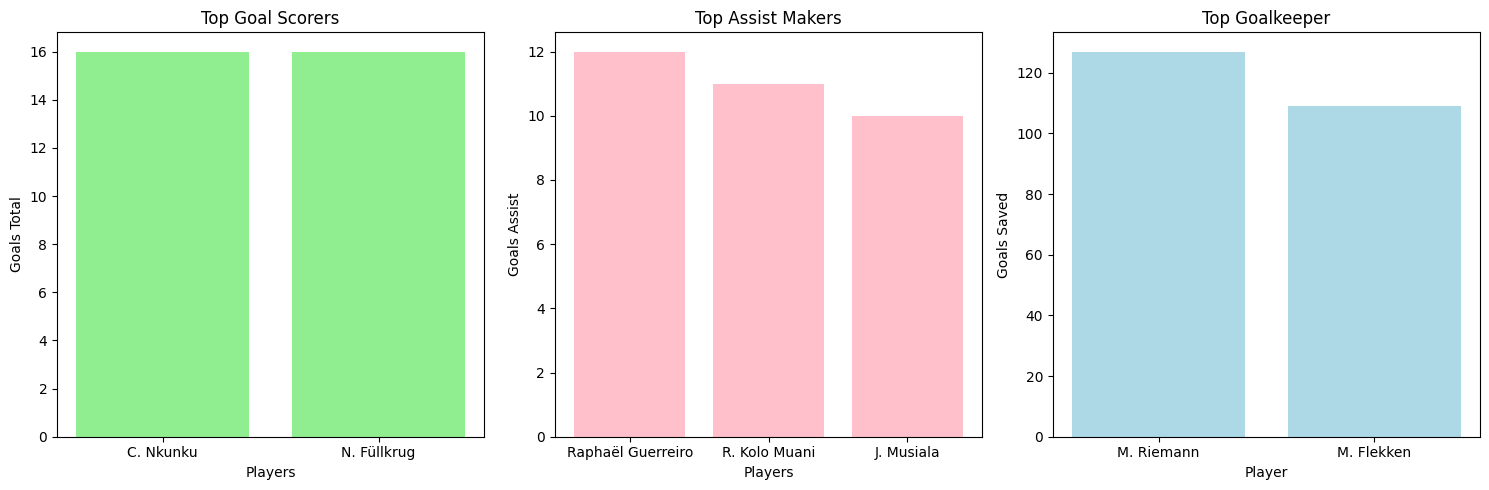

In [ ]:
## Top 3 Scored
top_goal_scorers = df.nlargest(3, 'Goals_Total')

# Top 3 assist makers
top_assist_makers = df.nlargest(3, 'Goals_Assist')

## Top 3 goalKeeper
top_goalkeeper = df[df['Position'] == 'Goalkeeper'].nlargest(3, 'Goals_Saves')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].bar(top_goal_scorers['Name'], top_goal_scorers['Goals_Total'],  color='lightgreen')
axes[0].set_title('Top Goal Scorers')
axes[0].set_xlabel('Players')
axes[0].set_ylabel('Goals Total')


axes[1].bar(top_assist_makers['Name'], top_assist_makers['Goals_Assist'], color='pink')
axes[1].set_title('Top Assist Makers')
axes[1].set_xlabel('Players')
axes[1].set_ylabel('Goals Assist')


axes[2].bar(top_goalkeeper['Name'], top_goalkeeper['Goals_Saves'],  color='lightblue')
axes[2].set_title('Top Goalkeeper')
axes[2].set_xlabel('Player')
axes[2].set_ylabel('Goals Saved')


plt.tight_layout()

plt.show()

In [ ]:
## Player rating radar chart (one from each position)
metrics_top = ['Accuracy_Passes', 'Key_Passes', 'Dribbles_Success', 'Shots_On', 'Duels_Won' , 'Goals_Assist' , 'Goals_Total']

selected_player =  df.nlargest(1, 'Goals_Assist')

# Extract values for the selected player
values = selected_player[metrics_top].values



In [ ]:
## top scorer
metrics_top = ['Accuracy_Passes', 'Key_Passes', 'Dribbles_Success', 'Shots_On', 'Duels_Won' , 'Goals_Assist' , 'Goals_Total']
selected_player =  df.nlargest(1, 'Goals_Total')

values_top = selected_player[metrics_top].values


In [ ]:
## visualising the above metric data
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=values_top[0],
      theta=metrics_top,
      fill='toself',
      name='Haaland'
))
fig.add_trace(go.Scatterpolar(
      r=values[0],
      theta=metrics_top,
      fill='toself',
      name='KDB'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 180]
    )),
  showlegend=True
)

fig.show()

In [ ]:
### most number of red / yellow cards by a team

team_stats = df.groupby('Team').agg({'Red_Cards': 'sum', 'Yellow_Cards': 'sum', 'Yellow_Red_Cards' : 'sum'}).reset_index()
team_with_most_red = team_stats.loc[team_stats['Red_Cards'].idxmax(), 'Team']

# Finding the team with the most yellow cards
team_with_most_yellow = team_stats.loc[team_stats['Yellow_Cards'].idxmax(), 'Team']


team_stats['Total_Cards'] = team_stats['Red_Cards'] + team_stats['Yellow_Cards']

# Creating a stacked bar graph
fig = px.bar(team_stats, x='Team', y=['Red_Cards', 'Yellow_Cards'],
             title=f"Red and Yellow Cards by Team (Most Red: {team_with_most_red}, Most Yellow: {team_with_most_yellow})",
             labels={'value': 'Number of Cards', 'variable': 'Card Type'},
             color_discrete_map={'Red_Cards': 'red', 'Yellow_Cards': 'yellow'},
             barmode='stack')

fig.show()


In [ ]:
### max minutes played with number goal score / goal saved


top_players_by_position = df.groupby('Position').apply(lambda x: x.nlargest(5, 'Minutes')).reset_index(drop=True)


df_midfielder_attacker = df[df['Position'].isin(['Midfielder', 'Forward'])]
df_defender_goalkeeper = df[df['Position'].isin(['Defender', 'Goalkeeper'])]


fig = make_subplots(rows=1, cols=2, subplot_titles=['Goals Scored - Midfielders/Attackers', 'Goals Saved - Defenders/Goalkeepers'])

# Scatter plot for goals scored - Midfielders/Attackers
fig.add_trace(go.Scatter(x=df_midfielder_attacker['Name'], y=df_midfielder_attacker['Goals_Total'],
                         mode='markers', marker=dict(color='blue')),
              row=1, col=1)

# Scatter plot for goals Saved - Defenders/Goalkeepers
fig.add_trace(go.Scatter(x=df_defender_goalkeeper['Name'], y=df_defender_goalkeeper['Goals_Saves'],
                         mode='markers', marker=dict(color='green')),
              row=1, col=2)

fig.update_layout(title_text='Most Crucial Players',
                  showlegend=False)

fig.show()


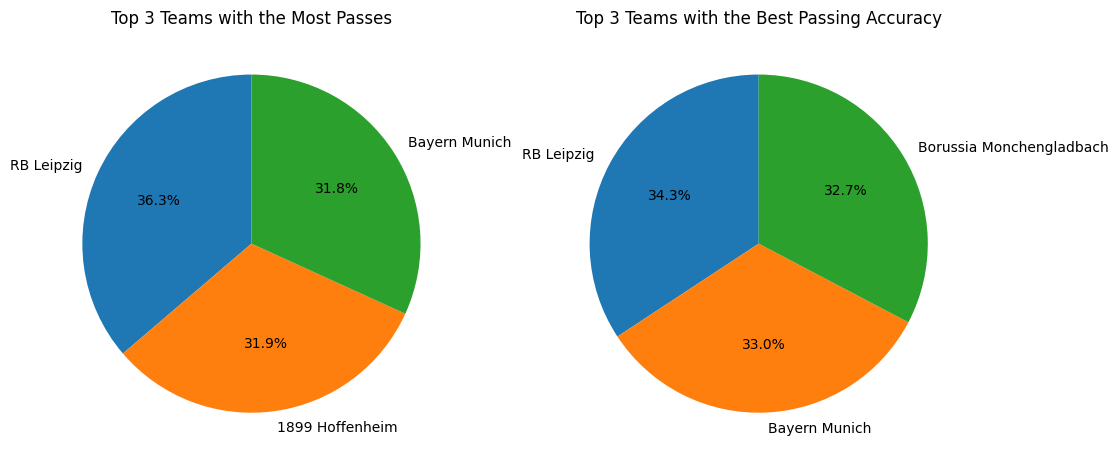

In [ ]:
### Team having best paasing accuracy and highest number of passes

team_stats = df.groupby('Team').agg({'Accuracy_Passes': 'mean', 'Total_Passes': 'sum' , 'Key_Passes' : 'sum'}).reset_index()

top3_most_passes = team_stats.nlargest(3, 'Total_Passes')

# Finding the top 3 teams with the best passing accuracy
top3_best_accuracy = team_stats.nlargest(3, 'Accuracy_Passes')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Ploting pie chart for the top 3 teams with the most passes
axs[0].pie(top3_most_passes['Total_Passes'], labels=top3_most_passes['Team'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Top 3 Teams with the Most Passes')

# Ploting pie chart for the top 3 teams with the best passing accuracy
axs[1].pie(top3_best_accuracy['Accuracy_Passes'], labels=top3_best_accuracy['Team'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Top 3 Teams with the Best Passing Accuracy')

plt.show()

In [ ]:
### player ratings and team-wise distributions for comparison.


fig = px.histogram(df, x='Rating', color='Team', marginal='rug',
                   nbins=20, opacity=0.7, barmode='overlay',
                   title='Player Rating Distribution by Team',
                   labels={'Rating': 'Player Rating', 'count': 'Frequency'})

fig.show()

In [ ]:
###  duels won Vs total duels and goals scored

fig = px.scatter(df, x='Duels_Total', y='Duels_Won', size='Goals_Total', color='Rating', hover_name='Name',
                 labels={'Duels_Total': 'Total Duels', 'Duels_Won': 'Duels Won', 'Goals_Scored': 'Goals Scored', 'Rating': 'Player Rating', 'Team' : 'Team'},
                 title='Relationship between Duels Won, Total Duels, and Goals Scored',
                 size_max=30, opacity=0.8)
fig.show()


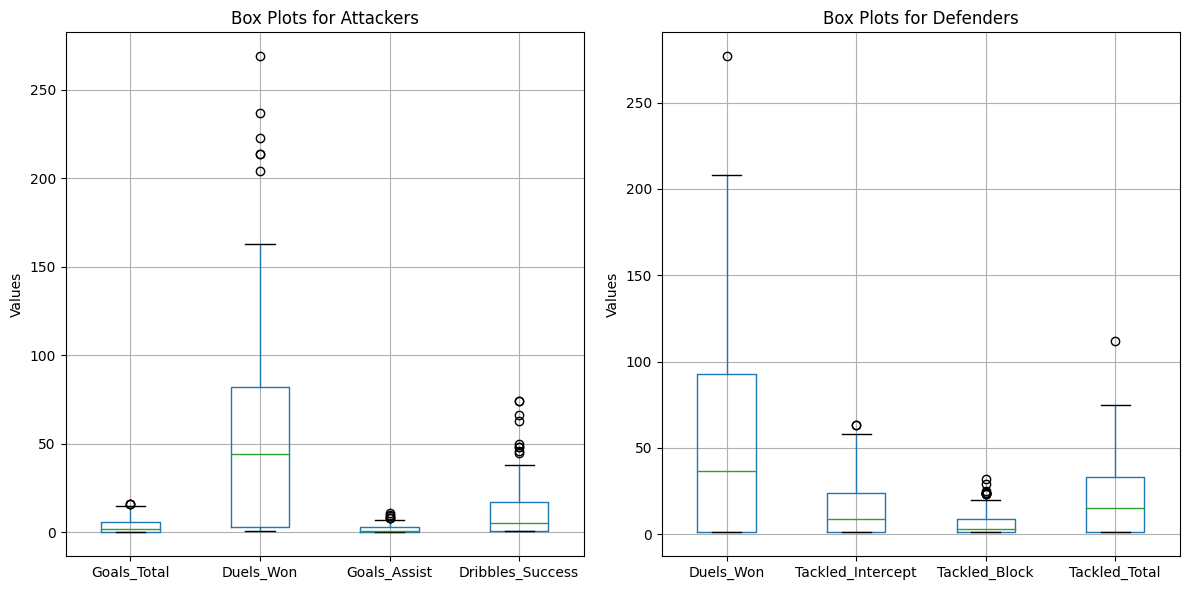

In [ ]:
## box plot to understand the distribution of all the player metrics
df_attackers = df[df['Position'] == 'Attacker']
df_defenders = df[df['Position'] == 'Defender']

# Define metrics for attackers and defenders
metrics_attackers = ['Goals_Total', 'Duels_Won', 'Goals_Assist', 'Dribbles_Success']
metrics_defenders = ['Duels_Won', 'Tackled_Intercept', 'Tackled_Block', 'Tackled_Total']

# Create subplots for attackers and defenders
fig, axs = plt.subplots(1, 2, figsize=(12, 6),)

# Plot box plots for attackers
df_attackers.boxplot(column=metrics_attackers, ax=axs[0])
axs[0].set_title('Box Plots for Attackers')
axs[0].set_ylabel('Values')

# Plot box plots for defenders
df_defenders.boxplot(column=metrics_defenders, ax=axs[1])
axs[1].set_title('Box Plots for Defenders')
axs[1].set_ylabel('Values')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
## Age Vs performace

age_bins = [16, 25, 30, df['Age'].max()]

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=['16-25', '26-30', '31+'])

fig = make_subplots(rows=1, cols=2, subplot_titles=['Goals Scored by Attackers/Midfielders', 'Goals Saved by Defenders/Goalkeepers'],
                       shared_yaxes=True)

# Subplot 1: Goals Scored by Attackers/Midfielders
for position in ['Attacker', 'Midfielder']:
    filtered_data = df[df['Position'] == position]
    fig.add_trace(go.Histogram(x=filtered_data['Age_Group'],
                               name=position,
                               nbinsx=10,
                               opacity=0.7,
                               marker_color='blue' if position == 'Attacker' else 'green'),
                  row=1, col=1)

# Subplot 2: Goals Saved by Defenders/Goalkeepers
for position in ['Defender', 'Goalkeeper']:
    filtered_data = df[df['Position'] == position]
    fig.add_trace(go.Histogram(x=filtered_data['Age_Group'],
                               name=position,
                               nbinsx=10,
                               opacity=0.7,
                               marker_color='red' if position == 'Goalkeeper' else 'purple'),
                  row=1, col=2)


fig.update_layout(
    title_text='Histogram of Goal Scored and Goals Saved for Players by Age Range and Position',
    xaxis_title='Age Range',
    yaxis_title='Frequency',
    barmode='overlay',  # 'overlay' for overlapping bars, 'stack' for stacked bars
    showlegend=True,
)

fig.show()

In [ ]:
## diversity in teams
team_nationality_counts = df.groupby('Team')['Nationality'].nunique()

team_nationality_counts = df.groupby('Team')['Nationality'].nunique()

# Sort teams by diversity (number of unique nationalities)
top_diverse_teams = team_nationality_counts.sort_values(ascending=False).head(10).reset_index()

# Assign colors to each nationality
colors = px.colors.qualitative.Set1[:len(top_diverse_teams)]

# Create a horizontal bar chart using Plotly
fig = px.bar(
    top_diverse_teams,
    x='Nationality',
    y='Team',
    color='Team',
    color_discrete_sequence=colors,
    labels={'Nationality': 'Number of Unique Nationalities', 'Team': 'Team'},
    title='Top 5 Most Diverse Teams Based on Nationality'
)

fig.update_layout(
    yaxis=dict(tickmode='array', tickvals=top_diverse_teams['Team'], ticktext=top_diverse_teams['Team']),
)

fig.show()

### Principle Component Analysis

In [108]:
df.columns

Index(['Age', 'Height', 'Weight', 'Nationality', 'Team', 'Position', 'Games',
       'Minutes', 'Accuracy_Passes', 'Key_Passes', 'Total_Passes', 'Shots_On',
       'Shots_Total', 'Dribbles_Attempts', 'Dribbles_Success', 'Fouls_Drawn',
       'Fouls_Committed', 'Tackled_Block', 'Tackled_Intercept',
       'Tackled_Total', 'Duels_Won', 'Duels_Total', 'Goals_Assist',
       'Goals_Total', 'Goals_Conceded', 'Goals_Saves', 'Rating',
       'Yellow_Cards', 'Red_Cards', 'Yellow_Red_Cards'],
      dtype='object')

In [109]:
df_filtered = df[['Games', 'Minutes', 'Accuracy_Passes', 'Key_Passes',
       'Total_Passes', 'Shots_On', 'Shots_Total', 'Dribbles_Attempts',
       'Dribbles_Success', 'Fouls_Drawn', 'Fouls_Committed', 'Tackled_Block',
       'Tackled_Intercept', 'Tackled_Total', 'Duels_Won', 'Duels_Total',
       'Goals_Assist', 'Goals_Total', 'Goals_Conceded', 'Goals_Saves',
       'Rating', 'Yellow_Cards', 'Red_Cards', 'Yellow_Red_Cards']]

In [110]:
df_filtered

,Games,Minutes,Accuracy_Passes,Key_Passes,Total_Passes,Shots_On,Shots_Total,Dribbles_Attempts,Dribbles_Success,Fouls_Drawn,...,Duels_Won,Duels_Total,Goals_Assist,Goals_Total,Goals_Conceded,Goals_Saves,Rating,Yellow_Cards,Red_Cards,Yellow_Red_Cards
0,2.0,35.0,7.0,1.0,19.0,0.0,1.0,1.0,1.0,1.0,...,1.0,7.0,0.0,0.0,0.0,0.0,6.300000,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.755355,0.0,0.0,0.0
2,8.0,373.0,19.0,2.0,199.0,0.0,1.0,1.0,1.0,2.0,...,12.0,25.0,0.0,0.0,0.0,0.0,6.775000,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.755355,0.0,0.0,0.0
4,3.0,136.0,15.0,1.0,38.0,0.0,1.0,1.0,1.0,5.0,...,10.0,17.0,0.0,0.0,0.0,0.0,6.766666,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,25.0,1961.0,33.0,73.0,1089.0,6.0,12.0,33.0,19.0,12.0,...,74.0,145.0,9.0,2.0,0.0,0.0,7.248148,5.0,0.0,0.0
2336,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.755355,0.0,0.0,0.0
2337,4.0,93.0,6.0,2.0,27.0,0.0,1.0,5.0,3.0,1.0,...,7.0,17.0,0.0,0.0,0.0,0.0,6.633333,0.0,0.0,0.0
2338,14.0,313.0,6.0,6.0,120.0,7.0,9.0,21.0,10.0,5.0,...,27.0,67.0,0.0,4.0,0.0,0.0,6.838461,3.0,0.0,0.0


In [111]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(df_filtered) ### truncating to 6 principal components

In [112]:
x = pd.DataFrame(X_pca)
x

,0,1,2,3,4,5
0,-1033.602819,33.263565,7.222137,0.129746,1.049716,0.183763
1,-1073.354726,32.354164,8.898443,0.478529,-0.374190,-0.355104
2,-650.497559,49.090709,21.638011,-3.198090,2.701752,-2.342163
3,-1073.354726,32.354164,8.898443,0.478529,-0.374190,-0.355104
4,-933.595616,6.467098,5.979534,-2.995437,0.142493,1.325885
...,...,...,...,...,...,...
2335,1172.689715,157.243124,39.851441,35.023221,4.368893,-31.082911
2336,-1073.354726,32.354164,8.898443,0.478529,-0.374190,-0.355104
2337,-977.065287,14.635616,2.065524,1.726118,-0.633198,0.761359
2338,-733.998750,-0.710252,-32.205790,9.287957,-2.988737,1.235528


In [113]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [114]:
cumulative_variance_ratio

array([0.95891261, 0.99539718, 0.99925764, 0.99955017, 0.9996555 ,
       0.99975209])

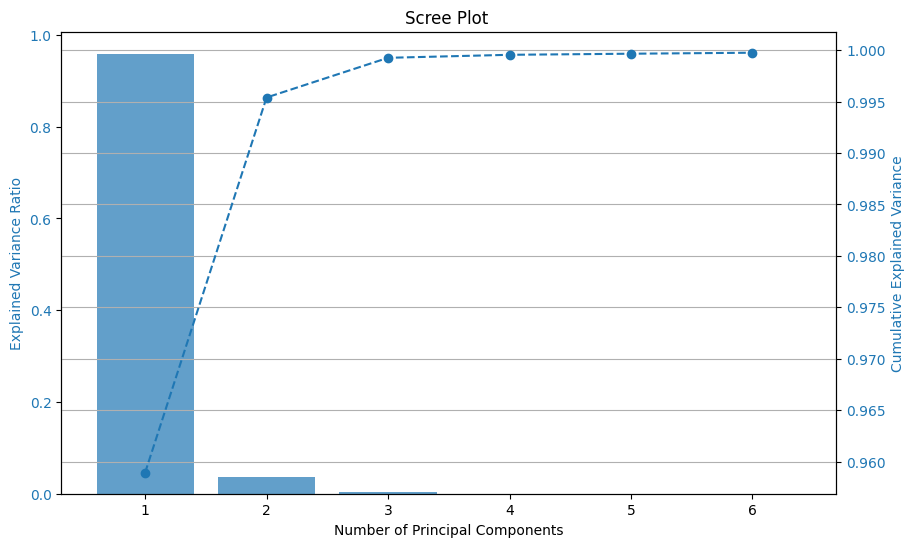

In [115]:
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:blue'
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Explained Variance Ratio', color=color)
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Line plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Cumulative Explained Variance', color=color)
ax2.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and display the plot
plt.title('Scree Plot ')
plt.grid(True)
plt.show()

### K MEANS CLUSTERING

In [116]:
from sklearn.cluster import KMeans

### Elbow Method

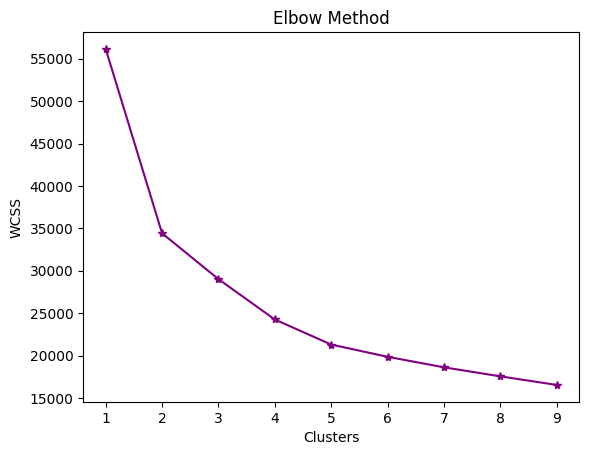

In [117]:
scaler = StandardScaler()
df_new = scaler.fit_transform(df_filtered)

num_clusters = 10
wcss = []
for i in range(1, num_clusters):
        kmeans = KMeans(n_clusters=i,n_init = 10 , random_state=1242)
        kmeans.fit(df_new)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, num_clusters), wcss, marker='*', color = 'purple')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette_scores

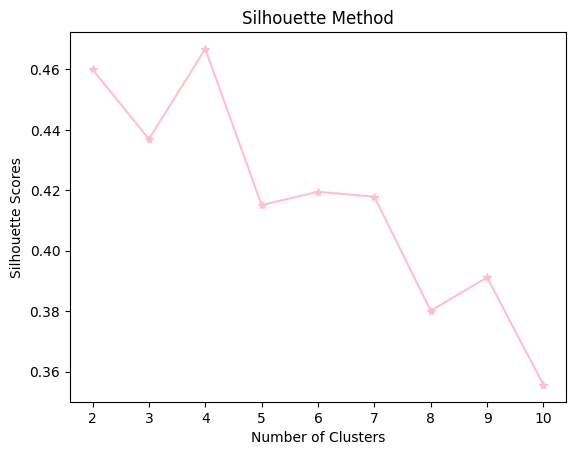

In [118]:
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,n_init = 10, random_state=1242)
    kmeans.fit(df_new)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_new, labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(range(2, 11), silhouette_scores, marker='*', color='pink')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()

### Clustering

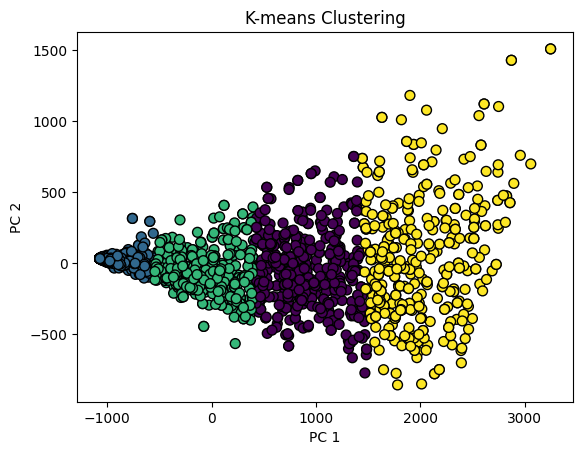

In [119]:
# k-means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1242)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, edgecolors='k', s=50)
plt.title('K-means Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


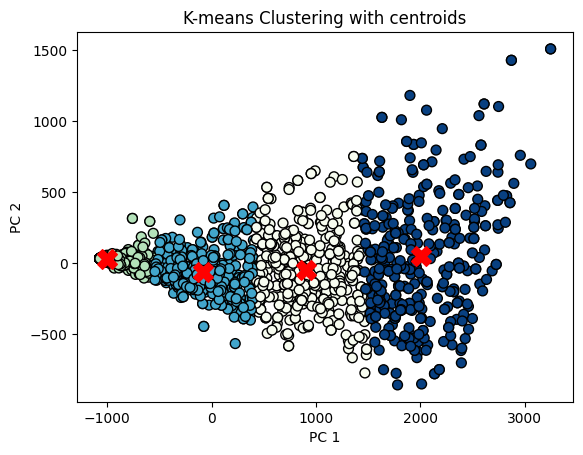

In [120]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='GnBu', edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')
plt.title('K-means Clustering with centroids')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

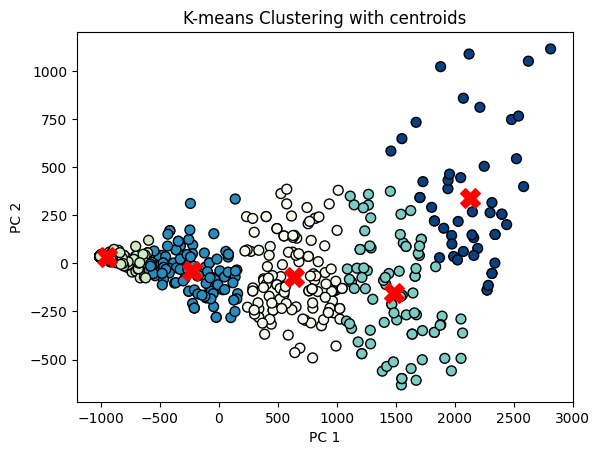

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=1242)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='GnBu', edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')
plt.title('K-means Clustering with centroids')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Hierarchical Clustering

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [72.5, 72.5, 111.875, 111.875],
  [18.125, 18.125, 92.1875, 92.1875],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [163.75, 163.75, 203.75, 203.75],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [282.5, 282.5, 321.25, 321.25],
  [250.0, 25

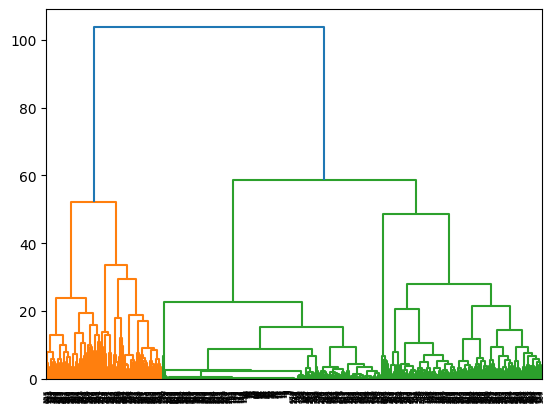

In [ ]:
linkage_data = linkage(df_new, method='ward', metric='euclidean')
dendrogram(linkage_data)

## Naive Bayes

In [63]:
df.columns

Index(['Id', 'Name', 'Age', 'Height', 'Weight', 'Nationality', 'Team',
       'Position', 'Games', 'Minutes', 'Accuracy_Passes', 'Key_Passes',
       'Total_Passes', 'Shots_On', 'Shots_Total', 'Dribbles_Attempts',
       'Dribbles_Success', 'Fouls_Drawn', 'Fouls_Committed', 'Tackled_Block',
       'Tackled_Intercept', 'Tackled_Total', 'Duels_Won', 'Duels_Total',
       'Goals_Assist', 'Goals_Total', 'Goals_Conceded', 'Goals_Saves',
       'Rating', 'Yellow_Cards', 'Red_Cards', 'Yellow_Red_Cards'],
      dtype='object')

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
df['Position']= le.fit_transform(df['Position'])
df['Team']= le.fit_transform(df['Team'])
df['Nationality']= le.fit_transform(df['Nationality'])
df = df.drop(['Id','Name'], axis = 1)
X = df.drop(['Position'] , axis =1)

In [66]:
X

,Age,Height,Weight,Nationality,Team,Games,Minutes,Accuracy_Passes,Key_Passes,Total_Passes,...,Duels_Won,Duels_Total,Goals_Assist,Goals_Total,Goals_Conceded,Goals_Saves,Rating,Yellow_Cards,Red_Cards,Yellow_Red_Cards
0,26.0,180.0,68.0,80,20,2.0,35.0,7.0,1.0,19.0,...,1.0,7.0,0.0,0.0,0.0,0.0,6.300000,1.0,1.0,0.0
1,35.0,182.0,76.0,85,20,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.755355,0.0,0.0,0.0
2,34.0,192.0,84.0,63,51,8.0,373.0,19.0,2.0,199.0,...,12.0,25.0,0.0,0.0,0.0,0.0,6.775000,1.0,0.0,0.0
3,34.0,178.0,74.0,85,39,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.755355,0.0,0.0,0.0
4,34.0,185.0,78.0,85,15,3.0,136.0,15.0,1.0,38.0,...,10.0,17.0,0.0,0.0,0.0,0.0,6.766666,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,26.0,187.0,79.0,23,52,25.0,1961.0,33.0,73.0,1089.0,...,74.0,145.0,9.0,2.0,0.0,0.0,7.248148,5.0,0.0,0.0
2336,22.0,180.0,78.0,65,40,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,6.755355,0.0,0.0,0.0
2337,21.0,185.0,73.0,92,23,4.0,93.0,6.0,2.0,27.0,...,7.0,17.0,0.0,0.0,0.0,0.0,6.633333,0.0,0.0,0.0
2338,23.0,178.0,75.0,35,52,14.0,313.0,6.0,6.0,120.0,...,27.0,67.0,0.0,4.0,0.0,0.0,6.838461,3.0,0.0,0.0


In [74]:
Y = df['Position']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X , Y , test_size = 0.2 , random_state=1221)

In [122]:
print("Train Length :",len(X_train),len(y_train), "\n Test Length :", len(X_test),len(y_test))

Train Length : 1872 1872 
 Test Length : 468 468


In [123]:
X_train.head()

,0,1,2,3,4,5
1051,543.827196,-154.769629,-11.119216,3.899130,0.414088,-13.109723
463,1029.759309,-386.348288,38.690810,-42.959789,2.061946,-23.375270
1200,1847.069167,-38.688750,-81.274877,-11.876970,-33.334889,-6.377136
701,-882.835427,-30.482062,12.062188,-3.374647,1.760418,0.082364
1753,772.377848,-156.181343,-9.354142,-48.706946,-2.632037,-8.036616


In [124]:
y_train.head()

1051    3
463     3
1200    1
701     0
1753    1
Name: Position, dtype: int64

In [125]:
X_test.head()

,0,1,2,3,4,5
2183,2560.680034,1039.849184,-48.649170,29.329935,8.333655,-9.750233
1570,696.952445,173.683006,-12.931862,-17.860313,-6.657697,-6.233548
622,-1073.354726,32.354164,8.898443,0.478529,-0.374190,-0.355104
998,-1073.354726,32.354164,8.898443,0.478529,-0.374190,-0.355104
1586,-1073.354726,32.354164,8.898443,0.478529,-0.374190,-0.355104


In [126]:
y_test.head()

2183    3
1570    1
622     3
998     2
1586    3
Name: Position, dtype: int64

In [127]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
import seaborn as sns

In [128]:
clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [129]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.47435897435897434


<Axes: >

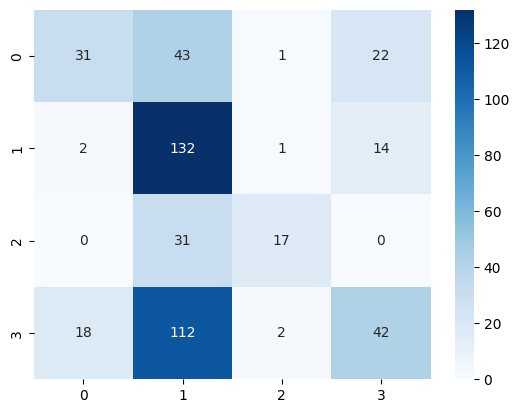

In [130]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.52      0.57        97
           1       0.60      0.59      0.59       149
           2       0.27      1.00      0.43        48
           3       0.66      0.25      0.37       174

    accuracy                           0.49       468
   macro avg       0.54      0.59      0.49       468
weighted avg       0.60      0.49      0.49       468



### Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import accuracy_score

In [149]:
tree_class = DecisionTreeClassifier(max_depth=2)
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [151]:
y_pred  = tree_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4444444444444444


In [153]:
tree_class = DecisionTreeClassifier(max_depth=5)
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [154]:
y_pred  = tree_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6089743589743589


In [157]:
tree_class = DecisionTreeClassifier(max_depth=10)
tree_class.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10)

In [158]:
y_pred  = tree_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6324786324786325


In [135]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_class = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_class, param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)
best_clf = grid_search.best_estimator_


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [136]:
export_graphviz(
    best_clf,
    out_file="tree.dot",
    feature_names=X.columns,
    class_names= 'position',
    rounded=True,
    filled=True
 )

In [139]:
from graphviz import render

render('dot', 'png', '/content/tree.dot')

'/content/diabetes_tree.dot.png'

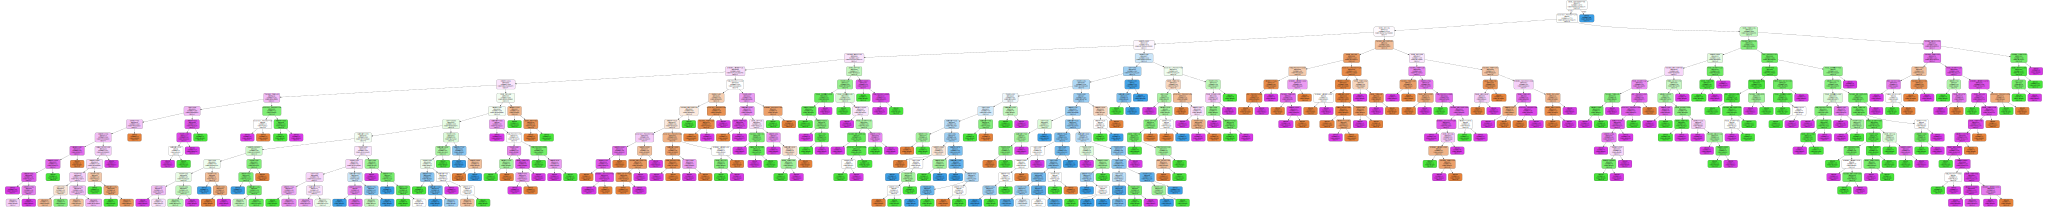

In [137]:
with open("diabetes_tree.dot") as f:
    dot_graph = f.read()
Source(dot_graph)

In [141]:
y_pred  = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6452991452991453


<Axes: >

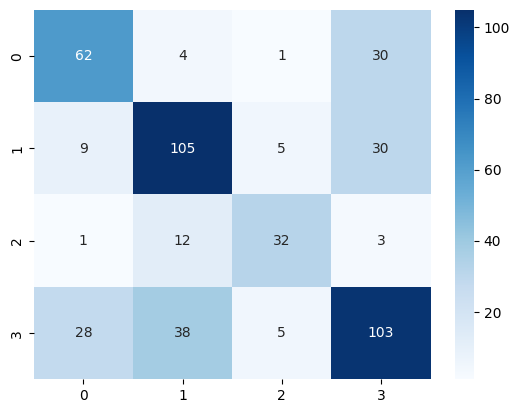

In [142]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        97
           1       0.66      0.70      0.68       149
           2       0.74      0.67      0.70        48
           3       0.62      0.59      0.61       174

    accuracy                           0.65       468
   macro avg       0.66      0.65      0.66       468
weighted avg       0.65      0.65      0.64       468

